<a href="https://colab.research.google.com/github/nawaz-kmr/INSAID_fruad_detection_model/blob/nawaz-kmr/INSAID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [7]:
%cd '/gdrive/MyDrive/project/INSAID_fruad_detection/'

/gdrive/MyDrive/project/INSAID_fruad_detection


In [3]:
!ls

'Data Dictionary.gdoc'	 Fraud.zip


In [4]:
!unzip 'Fraud.zip'

Archive:  Fraud.zip
  inflating: Fraud.csv               


In [4]:
!ls

'Data Dictionary.gdoc'	 Fraud.csv   Fraud.zip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#read the dataset
data = pd.read_csv('Fraud.csv')
data.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#checking for null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
# describe some statistic
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [19]:
#correlation of the variables
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


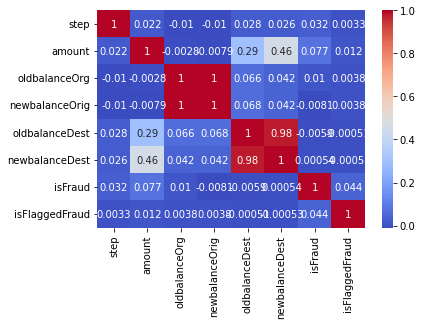

In [25]:
sns.heatmap(data.corr(),cmap='coolwarm',annot =True)

In [26]:
# frequency of target value
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

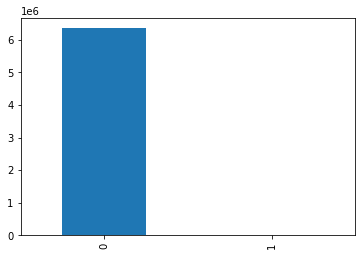

In [28]:
data.isFraud.value_counts().plot(kind ='bar')

In [29]:
data[data.isFlaggedFraud ==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [10]:
# feature engineering add new feature to the dataframe which will show the transaction is fraud if amount is >=200000
data['above200000'] = data['amount'] >= 200000.00
data['above200000'] = data.above200000.map({False:0,True:1})

In [54]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,above200000
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1


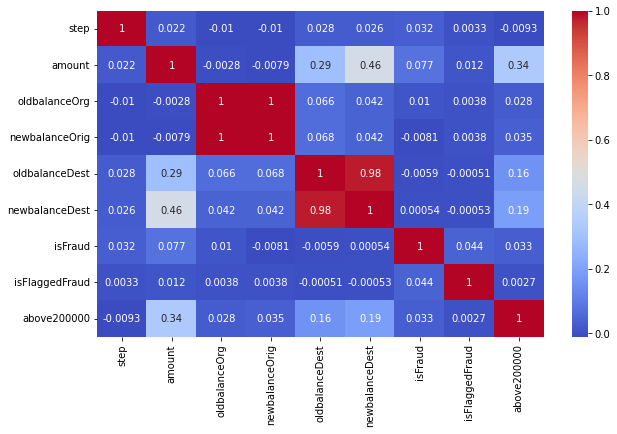

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot =True,)


In [59]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'above200000'],
      dtype='object')

In [60]:
# it gives low score so we can drop this
from sklearn.metrics.cluster import mutual_info_score
mutual_info_score(data.type,data.isFraud)

0.0013803993713626048

In [11]:
#create new dataframe for training and drop unnecessary features
x_train = data.drop(columns=['step','type','nameOrig','nameDest','isFlaggedFraud','isFraud'])

In [65]:
data.amount.max()

92445516.64

In [66]:
data.amount.mean()

179861.90354913071

In [67]:
data.amount.std()

603858.2314629358

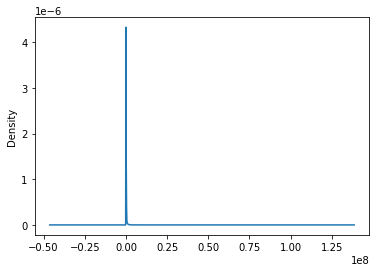

In [68]:
data.amount.plot.kde()

In [12]:
# the data does't follow n-dist so we can use normalization instead of standadization
# normalize
df_norm = pd.DataFrame(columns=[x_train.columns])

In [13]:
df_norm['amount'] = (data['amount'] - data['amount'].min()) / (data['amount'].max() -data['amount'].min())

In [14]:
df_norm['oldbalanceOrg'] = (data['oldbalanceOrg'] - data['oldbalanceOrg'].min()) / (data['oldbalanceOrg'].max() -data['oldbalanceOrg'].min())
df_norm['newbalanceOrig'] = (data['newbalanceOrig'] - data['newbalanceOrig'].min()) / (data['newbalanceOrig'].max() -data['newbalanceOrig'].min())
df_norm['oldbalanceDest'] = (data['oldbalanceDest'] - data['oldbalanceDest'].min()) / (data['oldbalanceDest'].max() -data['oldbalanceDest'].min())
df_norm['newbalanceDest'] = (data['newbalanceDest'] - data['newbalanceDest'].min()) / (data['newbalanceDest'].max() -data['newbalanceDest'].min())

In [15]:
df_norm['above200000'] = data.above200000

In [25]:
# new dataframe , it is scaled
df_norm

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,above200000
0,0.000106,0.002855,0.003233,0.000000,0.000000,0
1,0.000020,0.000357,0.000391,0.000000,0.000000,0
2,0.000002,0.000003,0.000000,0.000000,0.000000,0
3,0.000002,0.000003,0.000000,0.000059,0.000000,0
4,0.000126,0.000697,0.000603,0.000000,0.000000,0
...,...,...,...,...,...,...
6362615,0.003674,0.005701,0.000000,0.000000,0.000954,1
6362616,0.068272,0.105923,0.000000,0.000000,0.000000,1
6362617,0.068272,0.105923,0.000000,0.000192,0.017912,1
6362618,0.009195,0.014265,0.000000,0.000000,0.000000,1


In [16]:
# split the data for training and validation
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test  = train_test_split(df_norm, data.isFraud,test_size=0.2)

In [30]:
Y_train.shape

(5090096,)

In [31]:
X_test.shape

(1272524, 6)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

In [33]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
pred = classifier.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [36]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,precision_score,recall_score

In [37]:
confusion_matrix(Y_test,pred)

array([[1270862,      37],
       [    537,    1088]])

In [38]:
accuracy_score(Y_test,pred)

0.999548927957351

In [40]:
precision_score(Y_test,pred)

0.9671111111111111

In [41]:
recall_score(Y_test,pred)

0.6695384615384615

In [42]:
f1_score(Y_test,pred)

0.7912727272727272

In [44]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270899
           1       0.97      0.67      0.79      1625

    accuracy                           1.00   1272524
   macro avg       0.98      0.83      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
classifier2 = GradientBoostingClassifier()
classifier2.fit(X_train, Y_train)
pred2 = classifier2.predict(X_test)


In [24]:
confusion_matrix(Y_test,pred2)

array([[1270927,       1],
       [   1571,      25]])

In [25]:
accuracy_score(Y_test,pred2)

0.9987646598413861

In [26]:
print(classification_report(Y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.96      0.02      0.03      1596

    accuracy                           1.00   1272524
   macro avg       0.98      0.51      0.52   1272524
weighted avg       1.00      1.00      1.00   1272524



In [50]:
# Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
# params
grid_params = {'n_estimators' : [80, 90, 100, 110, 115, 120],
               'learning_rate':[0.1,0.05,0.5,0.3,0.7,0.06,0.002,0.9,0.005],
               'min_samples_split': [2,3,4,5,6,7,8],
               'max_depth':[2,3,4,5,6,7],
               'max_features':[None, 'auto', 'sqrt', 'log2']
               }
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_params,
                                   n_iter=200,
                                   cv=5,
                                   n_jobs=-1)
random_search.fit(X_train,Y_train)

In [ ]:
# Due to GPU usage limit my runtime gets disconnected

In [32]:
from sklearn.metrics import roc_auc_score, confusion_matrix

# Get predicted probabilities for fraud
y_pred_proba = classifier.predict_proba(X_test)[:,1]

# Find optimal threshold using roc_auc_score
threshold = 0
best_score = 0
for i in np.arange(0,1,0.05):
    y_pred_val = y_pred_proba > i
    score = roc_auc_score(Y_test, y_pred_val)
    if score > best_score:
        best_score = score
        threshold = i

# Use the optimal threshold to make predictions
y_pred = y_pred_proba > threshold

# Get the recall score
recall = recall_score(Y_test, y_pred)
print("Recall: ", recall)

# Get the confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred)
print("Confusion matrix: \n", conf_mat)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Recall:  0.8308270676691729
Confusion matrix: 
 [[1270003     925]
 [    270    1326]]


In [35]:
print(classification_report(Y_test, y_pred));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.59      0.83      0.69      1596

    accuracy                           1.00   1272524
   macro avg       0.79      0.92      0.84   1272524
weighted avg       1.00      1.00      1.00   1272524



In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
sm = SMOTE(sampling_strategy='minority')
x_train_sm, y_train_sm = sm.fit_resample(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [38]:
x_train_sm.shape

(10166958, 6)

In [40]:
classifier = RandomForestClassifier()
classifier.fit(x_train_sm, y_train_sm)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

In [41]:
pred = classifier.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [42]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.69      0.75      0.72      1596

    accuracy                           1.00   1272524
   macro avg       0.85      0.87      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



For data cleaning, I would first check for missing values and remove any rows with missing- values. I would then check for outliers in the amount column and remove any extreme values that do not fall within a certain range. I would also check for multi-collinearity among the variables and remove any highly correlated variables.

I would use a supervised machine learning model, such as Random Forest or GB classifier, to classify transactions as fraudulent or non-fraudulent. I would also use feature engineering to create new variables that may be useful in detecting fraud, such as the ratio of the transaction amount to the initial balance or amount thrushold.

I would select variables to be included in the model based on their correlation with the target variable (isFraud) and their importance in detecting fraud. Variables such as type, amount, and the initial and final balances of both the customer and the recipient would be important for the model.

I would use metrics such as precision, recall, F1 score, accuracy to evaluate the performance of the model. I would also use cross-validation to ensure that the model is not overfitting to the training data.

The key factors that predict fraudulent customers would likely include high transaction amounts, sudden changes in account balances, and transactions involving multiple parties.

These factors make sense as they are indicative of suspicious or unusual activity that may be indicative of fraud. High transaction amounts and sudden changes in account balances may be indicative of an attempt to steal funds, while transactions involving multiple parties may be indicative of money laundering or other illegal activities.

To prevent fraud, the company could implement measures such as transaction monitoring, account monitoring, and two-factor authentication. Additionally, the company could also train its employees to identify and report suspicious activity.

To determine if these actions are effective, the company could track the number of fraudulent transactions before and after the implementation of these measures. Additionally, the company could also conduct regular audits and assessments to identify any areas where the system may be vulnerable to fraud.